In [ ]:
!pip install yfinance


[*********************100%***********************]  1 of 1 completed


✅ Data downloaded successfully!
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645645  179.499574  174.425140  174.542917  104487900
2022-01-04  176.378372  179.558489  175.809091  179.254221   99310400
2022-01-05  171.686691  176.839648  171.411868  176.290001   94537600
2022-01-06  168.820663  172.059668  168.467317  169.507721   96904000
2022-01-07  168.987534  170.921120  167.868606  169.694226   86709100
📊 Mean Squared Error: 14.20
📈 R^2 Score: 0.93


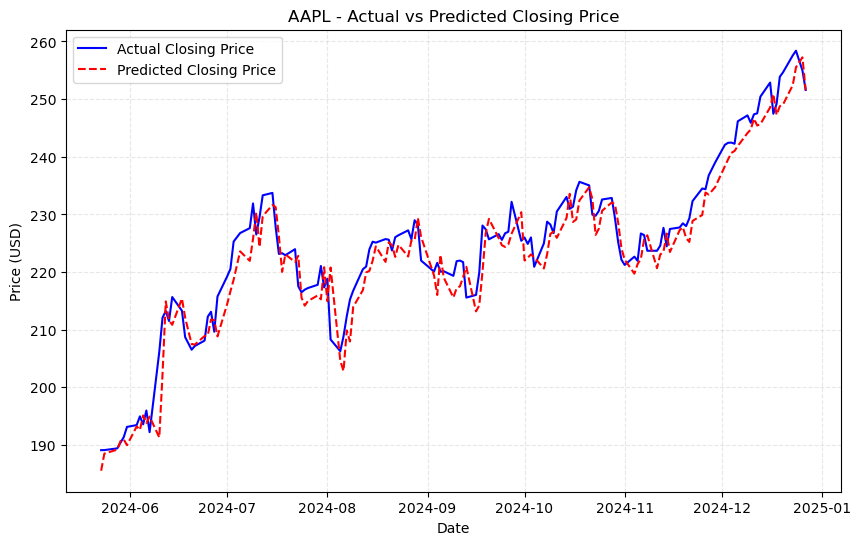

✅ Prediction complete. Save this notebook as 'stock_price_prediction.ipynb'


In [5]:
# 📌 Task 2: Predict Future Stock Prices (Short-Term) - Clean Version

import sys
import subprocess
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Install required libraries
subprocess.check_call([sys.executable, "-m", "pip", "install", "yfinance", "pandas", "scikit-learn", "matplotlib"])

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download historical stock data (Apple Inc.)
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2022-01-01", end="2024-12-31", auto_adjust=True)

print("✅ Data downloaded successfully!")
print(data.head())

# Step 2: Prepare features and target
df = data.copy()
df['Next_Close'] = df['Close'].shift(-1)  # Target: next day's close

# Drop last row (NaN target)
df = df[:-1]

# Features & target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Next_Close'

X = df[features]
y = df[target]

# Step 3: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error: {mse:.2f}")
print(f"📈 R^2 Score: {r2:.2f}")

# Step 7: Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{stock_symbol} - Actual vs Predicted Closing Price")
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

print("✅ Prediction complete. Save this notebook as 'stock_price_prediction.ipynb'")
